# Logistic Regression with a Neural Network mindset

In this Notebook, We will learn a simple Neural Network with Logisitic Regression in mind. This Notebook build a logistic regression classifier on a dataset. This notebook will step you through how to do this with a Neural Network mindset.
Acknowledgment: Adapted from DeepLearning.
Following things will be covered
- Building the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent)
- Gathering all three functions above into a main model function, in the right order.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import pandas as pd
%matplotlib inline

#### This example runs for binary classification. So load a binary dataset

In [4]:
data = pd.read_csv("./loan_data.csv")
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### Select numerical columns only.

In [5]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']
# Numerical columns
num_col = [col for col in data.columns if data[col].dtype != 'object']
#data.drop(['credit.policy'], axis=1)
for x in ['credit.policy']:
    num_col.remove(x)
print('Numerical columns :',num_col)

Numerical columns : ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']


####  Divide the data into training and test set

In [6]:
from sklearn import metrics

from sklearn.model_selection import train_test_split
print(num_col)
X = data[num_col]
print(X)
y = data["not.fully.paid"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']
      int.rate  installment  log.annual.inc    dti  fico  days.with.cr.line  \
0       0.1189       829.10       11.350407  19.48   737        5639.958333   
1       0.1071       228.22       11.082143  14.29   707        2760.000000   
2       0.1357       366.86       10.373491  11.63   682        4710.000000   
3       0.1008       162.34       11.350407   8.10   712        2699.958333   
4       0.1426       102.92       11.299732  14.97   667        4066.000000   
...        ...          ...             ...    ...   ...                ...   
9573    0.1461       344.76       12.180755  10.39   672       10474.000000   
9574    0.1253       257.70       11.141862   0.21   722        4380.000000   
9575    0.1071        97.81       10.596635  13.09   687        3450.041667   
9576    0.1600       351.58       10.81

#### Check and verify the data

In [7]:
m_train = X_train.shape[0]
m_test = X_test.shape[0]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))

Number of training examples: m_train = 7662
Number of testing examples: m_test = 1916


#### Convert the dataframe and series into numpy arrays

In [8]:
train_set_x_orig = np.array(X_train)
train_set_y_orig = np.array(y_train).reshape(1, -1) # Reshape y to be a row vector (1, m_train)

test_set_x_orig = np.array(X_test)
test_set_y_orig = np.array(y_test).reshape(1, -1) # Reshape y to be a row vector (1, m_test)

#### This is necessary step for full course, We will feed each neuron as features into row wise format

In [9]:
# Reshape the training and test examples




train_set_x_flatten = train_set_x_orig.T
test_set_x_flatten = test_set_x_orig.T


print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y_orig.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y_orig.shape))


train_set_x_flatten shape: (12, 7662)
train_set_y shape: (1, 7662)
test_set_x_flatten shape: (12, 1916)
test_set_y shape: (1, 1916)


##  Building the parts of our algorithm ##

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features)
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

###  - Helper functions

**Exercise**: Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use np.exp().
We are further cliping it to avoid going very low values

In [10]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    """

    s = 1/(1+np.exp(-z))
    epsilon = 1e-9
    s = np.clip(s, epsilon, 1 - epsilon)

    return s

###  Initializing parameters

 Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros.

In [11]:
def initialize_with_zeros(dim):

    w = np.zeros((dim,1))
    b = 0

    return w, b

In [12]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


### Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [13]:
def propagate(weights, bias, inputs, expected_output):
    """
    Implement the cost function and its gradient for the propagation explained above

    """

    m = inputs.shape[1]
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(weights.T,inputs) + bias)    # compute activation



    cost = (-1/m)*np.sum(expected_output*np.log(A)+ (1-expected_output)*np.log(1-A)) # compute cost


    # BACKWARD PROPAGATION (TO FIND GRAD)
    #ye abhi khali formula se kri hai because with different activation function ye formula change hoga.

    dw = np.dot(inputs, (A-expected_output).T)/m
    db = (1/m) * np.sum(A-expected_output)


    cost = np.squeeze(cost)

    grads = {"dw": dw,

             "db": db}

    return grads, cost


#### For Testing above function

In [14]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))
#cost=propagate(w, b, X, Y)

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


### Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [15]:

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

   """
    costs = []

    for i in range(num_iterations):


        # Cost and gradient calculation (≈ 1-4 lines of code)

        grads, cost = propagate(w,b,X,Y)


        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (≈ 2 lines of code)

        w = w - learning_rate*dw
        b = b - learning_rate*db


        # Record the costs
        if i % 100 == 0:
          costs.append(cost)

        # Print the cost every 100 training iterations
        # if print_cost and i % 100 == 0:
        #     print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

#### For Testing above Function

In [16]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


Previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this).

In [17]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture

    A = sigmoid(np.dot(w.T, X) +b)


    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]

        if A[0,i] <= 0.5:
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1

    return Y_prediction

#### For Testing

In [18]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.


In [19]:


def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """



    # initialize parameters with zeros (≈ 1 line of code)
    dim=X_train.shape[0]
    print(dim)
    w,b = np.zeros((dim,1)), 0


    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)



    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "Y_test" : Y_test,
         "Y_train" : Y_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

#### use the model

In [20]:
# d = model(train_set_x_flatten, train_set_y_orig, test_set_x_flatten, test_set_y_orig, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

#### Exercise : Plot learning curve

12
train accuracy: 83.90759592795615 %
test accuracy: 84.34237995824634 %


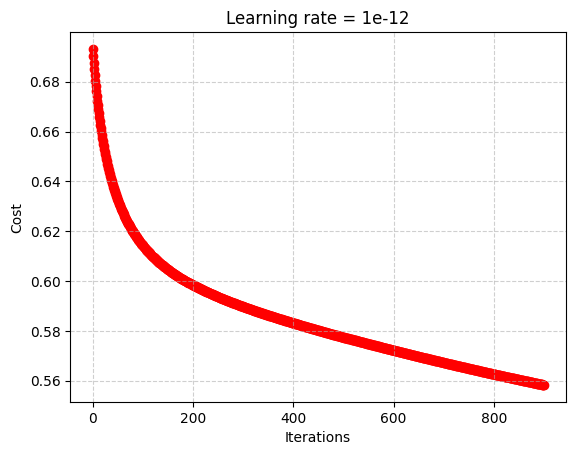

12
train accuracy: 83.90759592795615 %
test accuracy: 84.34237995824634 %


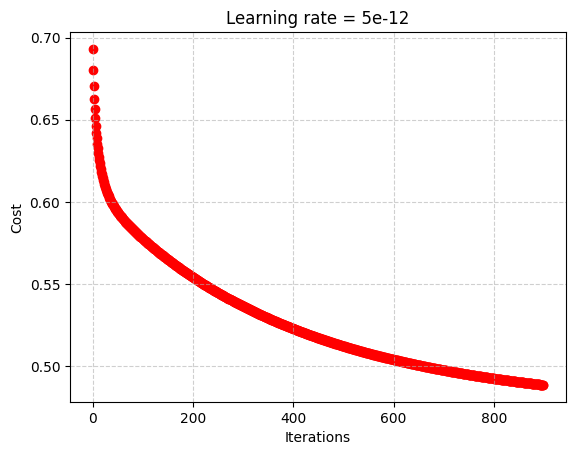

12
train accuracy: 83.88149308274602 %
test accuracy: 84.39457202505218 %


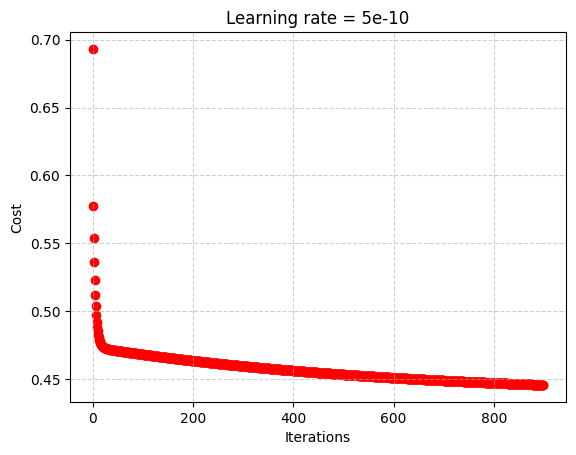

12
train accuracy: 83.89454450535109 %
test accuracy: 84.39457202505218 %


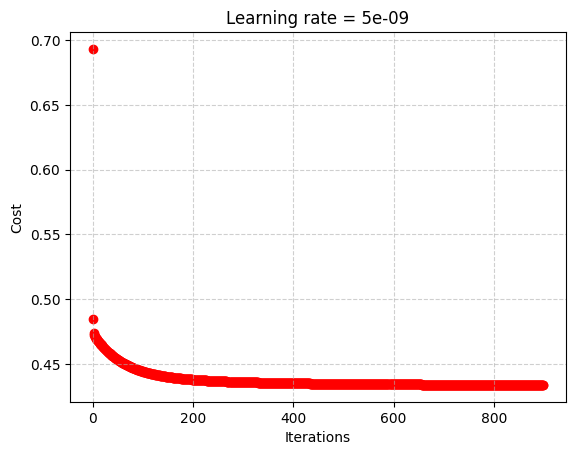

In [35]:
# def plot_costs(model_output, learning_rate=0.5):
#     costs = model_output["costs"]  # list of costs stored during training
#     plt.plot(costs)                # plot costs over iterations
#     plt.ylabel('cost')
#     plt.xlabel('iterations')
#     plt.title("Learning rate = " + str(learning_rate))
#     plt.show()

def plot_costs(model_output, learning_rate=0.5):
    costs = model_output["costs"]  # list of costs stored during training
    iterations = range(len(costs)) # x-axis: iteration numbers

    # Scatter plot (points only, no connecting lines)
    plt.scatter(iterations, costs, marker='o', color='red')

    # Labels and title
    plt.ylabel('Cost')
    plt.xlabel('Iterations')
    plt.title(f"Learning rate = {learning_rate}")
    plt.grid(True, linestyle='--', alpha=0.6)  # optional grid for readability
    plt.show()

iters=90000
learn=0.000000000001
d = model(train_set_x_flatten, train_set_y_orig, test_set_x_flatten, test_set_y_orig, num_iterations = iters, learning_rate = learn, print_cost = True)
plot_costs(d, learning_rate=learn)

learn=0.000000000005
d = model(train_set_x_flatten, train_set_y_orig, test_set_x_flatten, test_set_y_orig, num_iterations = iters, learning_rate = learn, print_cost = True)
plot_costs(d, learning_rate=learn)

learn=0.0000000005
d = model(train_set_x_flatten, train_set_y_orig, test_set_x_flatten, test_set_y_orig, num_iterations = iters, learning_rate = learn, print_cost = True)
plot_costs(d, learning_rate=learn)

learn=0.000000005
d = model(train_set_x_flatten, train_set_y_orig, test_set_x_flatten, test_set_y_orig, num_iterations = iters, learning_rate = learn, print_cost = True)
plot_costs(d, learning_rate=learn)

In [23]:
learning_rates=[]
accuracies=[]
rate=0.01
for i in range(0,100):
  d=model(train_set_x_flatten, train_set_y_orig, test_set_x_flatten, test_set_y_orig, num_iterations = 2000, learning_rate = rate, print_cost = False)
  accuracies.append(100 - np.mean(np.abs(d['Y_prediction_test'] - d['Y_test'])) * 100)
  learning_rates.append(rate)
  rate+=0.01

print(learning_rates)
print(accuracies)
plt.scatter(np.array(learning_rates), np.array(accuracies), marker='o', color='red')

# Labels and title
plt.xlabel('Learning Rates')
plt.ylabel('Accuracies')
plt.title(f"Iterations = {2000}")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

12


/tmp/ipython-input-525153631.py:6: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-z))


KeyboardInterrupt: 